In [2]:
packages <- c("Seurat", "dplyr", "Matrix", "anndata",
              "ggplot2", "pheatmap", "RColorBrewer", "NMF","dplyr"
              )
lapply(packages, library, character.only = TRUE)

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: registry

Loading required package: rngtools

Loading required package: cluster

NMF - BioConductor layer [OK] | Shared memory capabilities [NO: bigmemory] | Cores 2/2

  To enable shared memory capabilities, try: install.extras('
NMF
')



[[1]]
[1] "SeuratObject" "Seurat"       "stats"        "graphics"     "grDevices"   
[6] "utils"        "datasets"     "methods"      "base"        

[[2]]
 [1] "dplyr"        "SeuratObject" "Seurat"       "stats"        "graphics"    
 [6] "grDevices"    "utils"        "datasets"     "methods"      "base"        

[[3]]
 [1] "Matrix"       "dplyr"        "SeuratObject" "Seurat"       "stats"       
 [6] "graphics"     "grDevices"    "utils"        "datasets"     "methods"     
[11] "base"        

[[4]]
 [1] "anndata"      "Matrix"       "dplyr"        "SeuratObject" "Seurat"      
 [6] "stats"        "graphics"     "grDevices"    "utils"        "datasets"    
[11] "methods"      "base"        

[[5]]
 [1] "ggplot2"      "anndata"      "Matrix"       "dplyr"        "SeuratObject"
 [6] "Seurat"       "stats"        "graphics"     "grDevices"    "utils"       
[11] "datasets"     "methods"      "base"        

[[6]]
 [1] "pheatmap"     "ggplot2"      "anndata"      "Matrix"       "dplyr"       
 [6] "SeuratObject" "Seurat"       "stats"        "graphics"     "grDevices"   
[11] "utils"        "datasets"     "methods"      "base"        

[[7]]
 [1] "RColorBrewer" "pheatmap"     "ggplot2"      "anndata"      "Matrix"      
 [6] "dplyr"        "SeuratObject" "Seurat"       "stats"        "graphics"    
[11] "grDevices"    "utils"        "datasets"     "methods"      "base"        

[[8]]
 [1] "NMF"          "Biobase"      "BiocGenerics" "parallel"     "cluster"     
 [6] "rngtools"     "registry"     "RColorBrewer" "pheatmap"     "ggplot2"     
[11] "anndata"      "Matrix"       "dplyr"        "SeuratObject" "Seurat"      
[16] "stats"        "graphics"     "grDevices"    "utils"        "datasets"    
[21] "methods"      "base"        

[[9]]
 [1] "NMF"          "Biobase"      "BiocGenerics" "parallel"     "cluster"     
 [6] "rngtools"     "registry"     "RColorBrewer" "pheatmap"     "ggplot2"     
[11] "anndata"      "Matrix"       "dplyr"        "SeuratObject" "Seurat"      
[16] "stats"        "graphics"     "grDevices"    "utils"        "datasets"    
[21] "methods"      "base"

In [15]:
h5ad_file <- "./CTCL/object_revision/MF17_tumourcell.h5ad"
sdata <- read_h5ad(h5ad_file)
sdata <- CreateSeuratObject(counts = t(as.matrix(sdata$X)), meta.data = sdata$obs)

In [16]:
sdata

An object of class Seurat 
15790 features across 3769 samples within 1 assay 
Active assay: RNA (15790 features, 0 variable features)

In [17]:
sdata@meta.data %>% head

,orig.ident,nCount_RNA,nFeature_RNA,Sanger_ID,tissue,site,Sex,batch,n_counts,n_genes,percent_mito,study,donor,tech,cell_type,barcode,type
,<fct>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
AAACCTGAGGCGATAC-2_HRR060116_HRR060116_MF17,SeuratProject,5248,2013,HRR060116,whole_skin,lesion,NA,2,7477,2245,0.03437207,HRJ,MF17,10x,tumor_cell,AAACCTGAGGCGATAC-2,tumor_cell
AAACCTGCAAACGTGG-2_HRR060116_HRR060116_MF17,SeuratProject,1745,1023,HRR060116,whole_skin,lesion,NA,2,2727,1203,0.04693803,HRJ,MF17,10x,tumor_cell,AAACCTGCAAACGTGG-2,tumor_cell
AAACCTGCACGCTTTC-2_HRR060116_HRR060116_MF17,SeuratProject,3146,1526,HRR060116,whole_skin,lesion,NA,2,4333,1728,0.05054235,HRJ,MF17,10x,tumor_cell,AAACCTGCACGCTTTC-2,tumor_cell
AAACCTGGTGCGCTTG-2_HRR060116_HRR060116_MF17,SeuratProject,2241,1238,HRR060116,whole_skin,lesion,NA,2,3379,1435,0.05593371,HRJ,MF17,10x,tumor_cell,AAACCTGGTGCGCTTG-2,tumor_cell
AAACCTGGTTCAACCA-2_HRR060116_HRR060116_MF17,SeuratProject,1241,856,HRR060116,whole_skin,lesion,NA,2,1544,946,0.15414508,HRJ,MF17,10x,tumor_cell,AAACCTGGTTCAACCA-2,tumor_cell
AAACCTGTCAACGAAA-2_HRR060116_HRR060116_MF17,SeuratProject,2063,1241,HRR060116,whole_skin,lesion,NA,2,3065,1428,0.08287112,HRJ,MF17,10x,tumor_cell,AAACCTGTCAACGAAA-2,tumor_cell


In [18]:
sdata <- NormalizeData(sdata, normalization.method = "LogNormalize", scale.factor = 10000)
sdata <- FindVariableFeatures(sdata, selection.method = "vst")
sdata <- ScaleData(object = sdata, vars.to.regress = "percent_mito")

Regressing out percent_mito

Centering and scaling data matrix



In [19]:
data <- as.matrix(sdata@assays$RNA@scale.data)
data[data<0] <- 0

In [20]:
set.seed(123)
rk <- 10
res <- nmf(data, rank = rk, nrun = 1, seed=1)
s <- extractFeatures(res, 30L)
#V.hat <- fitted(res)

In [21]:
data1 <- c()
for (i in 1:as.numeric(rk)) {
  data1 <- rbind(data1, as.matrix(sdata@assays$RNA@scale.data)[s[[i]],])
  sdata <- AddModuleScore(object = sdata, features = list(rownames(data)[s[[i]]]), name = paste("Pg", i, sep = "_"))
}

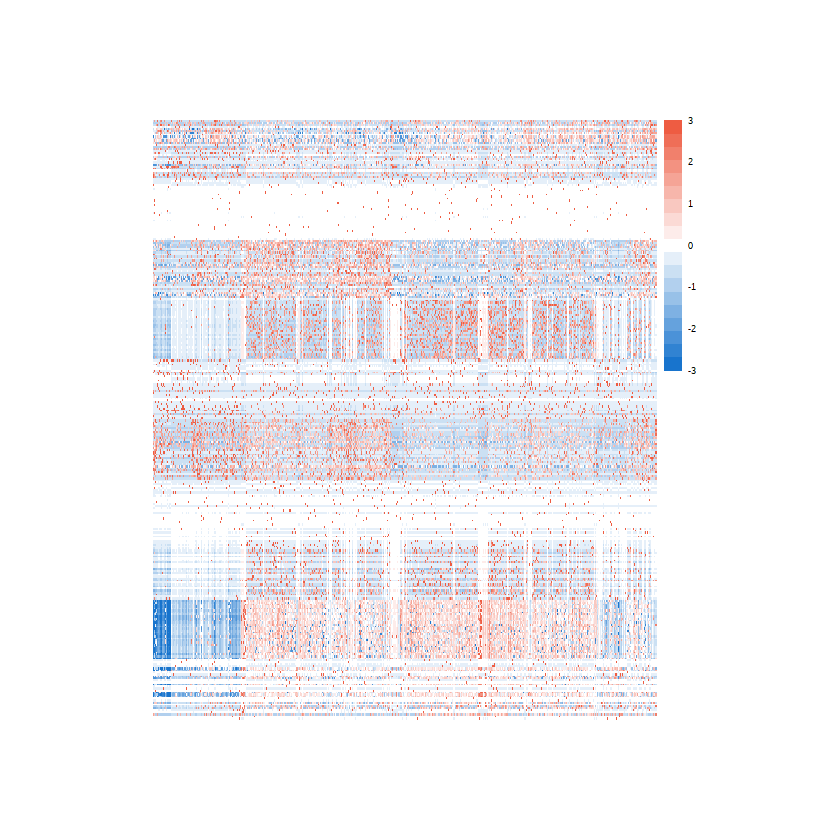

In [22]:
library(pheatmap)
library(RColorBrewer)

my_palette<-colorRampPalette(c("dodgerblue3","white","Tomato2"))(n=19)
data1[data1>3] <- 3
data1[data1< -3] <- -3
x <- pheatmap(data1,cluster_cols=T, cluster_rows=F, color=my_palette, scale="none",
              fontsize=5,treeheight_row=0,treeheight_col=0, cellheight = 1.2,cellwidth = 0.08,
              show_rownames=F,show_colnames=F, clustering_method = "ward.D",
              border_color=NA)

In [23]:
##### Filter programs ######
Pg_mat <- sdata@meta.data[ ,paste('Pg',"_",seq(1:rk), rep('1',rk), sep="")]
SD <- apply(Pg_mat, 2, sd)
SD

Pg_11      Pg_21      Pg_31      Pg_41      Pg_51      Pg_61      Pg_71 
0.34077521 0.03450787 0.41950604 0.23797671 0.12496444 0.44236178 0.04630476 
     Pg_81      Pg_91     Pg_101 
0.15944348 1.00413522 0.30012624

In [24]:
data2 <- c()
for (i in which(SD>0.1)) {
  data2 <- rbind(data2, as.matrix(sdata@assays$RNA@scale.data)[s[[i]],])
}

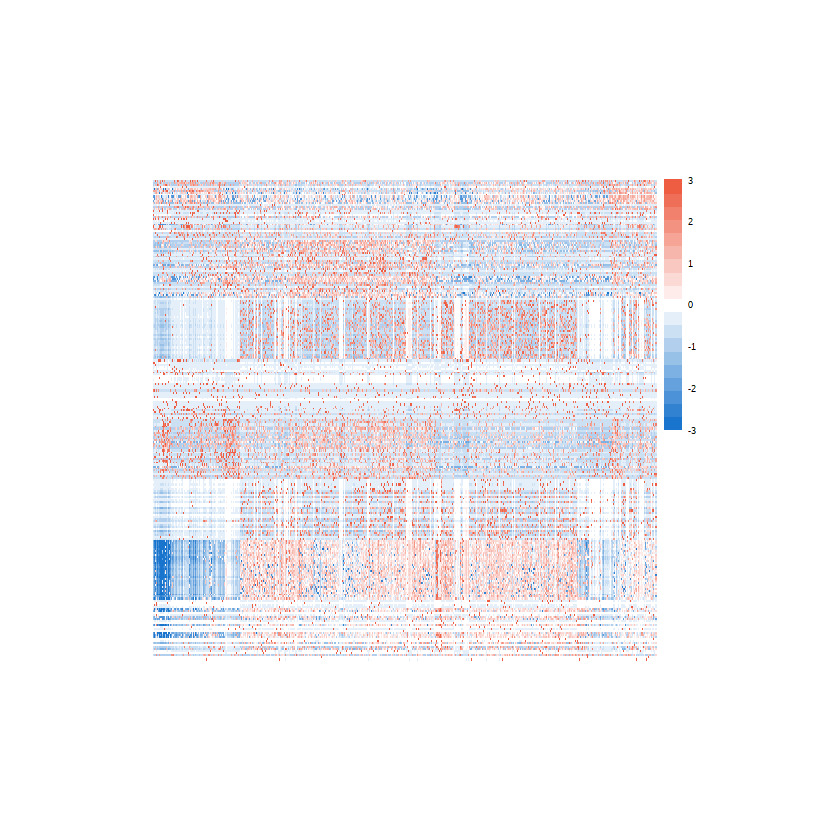

In [25]:
data2[data2>3] <- 3
data2[data2< -3] <- -3
x <- pheatmap(data2,cluster_cols=T, cluster_rows=F, color=my_palette, scale="none",
              fontsize=5,treeheight_row=0,treeheight_col=0, cellheight = 1.2,cellwidth = 0.08,
              show_rownames=F,show_colnames=F, clustering_method = "ward.D",
              border_color=NA)

In [26]:
write.table(data2, file="./CTCL/Exp_program_revision/program_mat_MF17_thre_0.1_final.xls", quote=F, sep="\t")

### expression program clustering

In [27]:
library(dplyr)
library(Seurat)
library(Matrix)
library(ggplot2)
library(pheatmap)
library(RColorBrewer)
library(viridis)

Loading required package: viridisLite



In [28]:
Pgs <- read.table("./CTCL/Exp_program_revision/programs_all_thre_0.1_final_new.xls", header=T)

In [29]:
####### Jaccard Index #####
jac <- function(x, y) {
  inter <- intersect(x, y)
  total <- union(x, y)
  similarity <- length(inter)/length(total)
  return(similarity)
}

In [42]:
Mat <- matrix(0, ncol = ncol(Pgs), nrow = ncol(Pgs))
rownames(Mat) <- colnames(Pgs)
colnames(Mat) <- colnames(Pgs)

for (i in 1:ncol(Pgs)) {
  for (j in 1:ncol(Pgs)) {
    ss <- jac(as.vector(Pgs[,i]), as.vector(Pgs[,j]))
    Mat[i,j] <- ss*100
  }
}

In [31]:
custom_magma <- c(colorRampPalette(c("white", rev(magma(323, begin = 0.15))[1]))(10), rev(magma(323, begin = 0.18)))
#custom_magma<-colorRampPalette(c("white","blue"))(n=299)


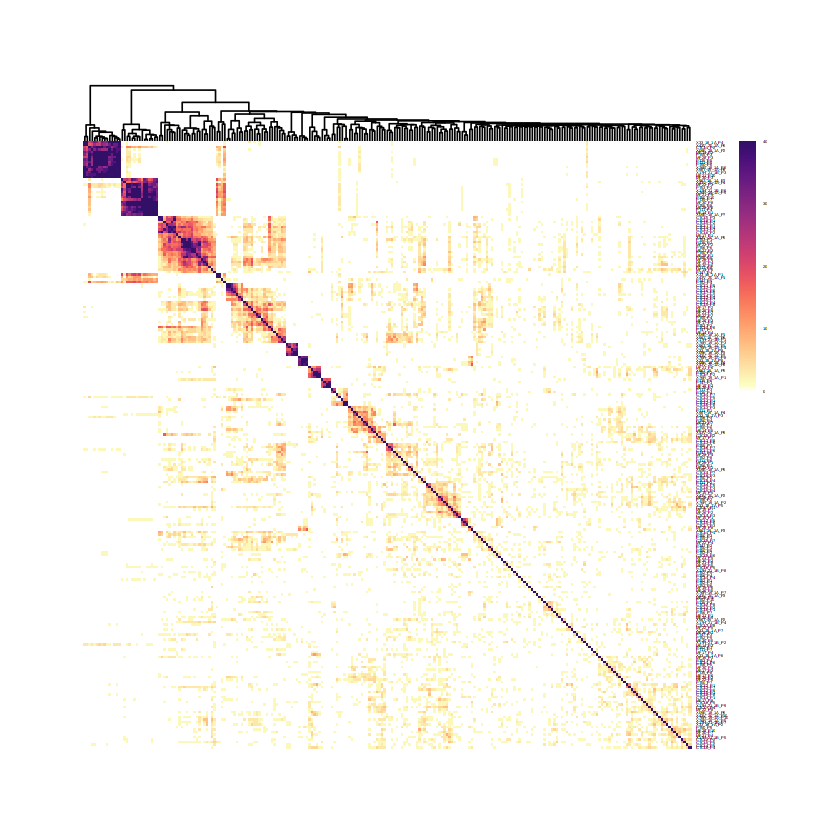

In [47]:
Mat[Mat>40] <- 40
x <- pheatmap(as.matrix(Mat), cluster_cols=T, cluster_rows=T, 
              clustering_distance_rows="euclidean", color=custom_magma, 
              fontsize=2,treeheight_row=0,treeheight_col=30, 
              cellheight = 1.5,cellwidth = 1.5,show_rownames=T, 
              show_colnames=F, border_color = "NA")

In [48]:
Mat[Mat>40] <- 40
x <- pheatmap(as.matrix(Mat), cluster_cols=T, cluster_rows=T, 
              clustering_distance_rows="euclidean", color=custom_magma, 
              fontsize=2,treeheight_row=0,treeheight_col=30, 
              cellheight = 2,cellwidth = 2,show_rownames=T, 
              show_colnames=F, border_color = "NA", filename = 'figures/meta_program_final_new.pdf')

In [34]:
Pgs %>% dim

[1]  30 243

### plot CTCL1

In [1]:
library(dplyr)
library(Seurat)
library(Matrix)
library(ggplot2)
library(pheatmap)
library(RColorBrewer)
library(viridis)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject

Loading required package: viridisLite



In [70]:
data <- read.table("./CTCL/Exp_program_revision/program_mat_CTCL1_thre_0.1_final.xls",
                   check.names = F, row.names=NULL)

In [71]:
data <- as.matrix(data[ ,-1])
data %>% dim

[1]  240 8068

In [72]:
diff <- setdiff(colnames(data), rownames(tcr))
inter <- intersect(colnames(data), rownames(tcr))

In [80]:
tcr_add <- cbind(rep('None', length(diff)), rep(1, length(diff)))
rownames(tcr_add) <- diff
colnames(tcr_add) <- c('clone','rm')
tcr_add %>% head

,clone,rm
AACTTTCTCTATGTGG-0_CTCL1_CTCL1,None,1
AAGCCGCAGAAACGAG-0_CTCL1_CTCL1,None,1
AAGGAGCAGACAGGCT-0_CTCL1_CTCL1,None,1
AATCCAGTCACGAAGG-0_CTCL1_CTCL1,None,1
ACACCGGCAAGCGTAG-0_CTCL1_CTCL1,None,1
ACACCGGCATACTACG-0_CTCL1_CTCL1,None,1


In [81]:
tcr <- read.table('.CTCL/TCR_revision/tcr_meta_CTCL1.xls')
tcr <- cbind(tcr, rep(1, nrow(tcr)))
colnames(tcr) <- c('clone','rm')
tcr <- tcr[intersect(colnames(data), rownames(tcr)), ]
tcr <- rbind(tcr, tcr_add)
tcr %>% head

,clone,rm
,<chr>,<chr>
AAACCTGAGTCATCCA-1_CTCL1_CTCL1,clone_CTCL1_pair,1
AAACCTGAGTCCGGTC-1_CTCL1_CTCL1,clone_CTCL1_pair,1
AAACCTGAGTCCTCCT-1_CTCL1_CTCL1,clone_CTCL1_pair,1
AAACCTGCAAAGGTGC-1_CTCL1_CTCL1,clone_CTCL1_pair,1
AAACCTGCACACTGCG-1_CTCL1_CTCL1,clone_CTCL1_pair,1
AAACCTGGTTGAGGTG-1_CTCL1_CTCL1,clone_CTCL1_pair,1


In [83]:
dim(tcr)

[1] 8068    2

In [82]:
tcr$clone %>% table

.
  clone_CTCL1_pair clone_CTCL1_TRA_sc clone_CTCL1_TRB_sc               None 
              6619                118                463                868 

In [85]:
tissue <- read.table('./CTCL/TCR_revision/tissue_CTCL1.xls')
tissue <- cbind(tissue, rep(1, nrow(tissue)))
tissue <- tissue[intersect(rownames(tcr), rownames(tissue)), ]
tissue %>% head

,tissue,"rep(1, nrow(tissue))"
,<chr>,<dbl>
AAACCTGAGTCATCCA-1_CTCL1_CTCL1,Epidermis,1
AAACCTGAGTCCGGTC-1_CTCL1_CTCL1,Epidermis,1
AAACCTGAGTCCTCCT-1_CTCL1_CTCL1,Epidermis,1
AAACCTGCAAAGGTGC-1_CTCL1_CTCL1,Epidermis,1
AAACCTGCACACTGCG-1_CTCL1_CTCL1,Epidermis,1
AAACCTGGTTGAGGTG-1_CTCL1_CTCL1,Epidermis,1


In [86]:
tissue %>% dim

[1] 8068    2

In [87]:
meta <- cbind(tissue, tcr[,1])
meta <- meta[,-2]
colnames(meta) <- c('tissue', 'clone')
meta %>% head
meta %>% dim

,tissue,clone
,<chr>,<chr>
AAACCTGAGTCATCCA-1_CTCL1_CTCL1,Epidermis,clone_CTCL1_pair
AAACCTGAGTCCGGTC-1_CTCL1_CTCL1,Epidermis,clone_CTCL1_pair
AAACCTGAGTCCTCCT-1_CTCL1_CTCL1,Epidermis,clone_CTCL1_pair
AAACCTGCAAAGGTGC-1_CTCL1_CTCL1,Epidermis,clone_CTCL1_pair
AAACCTGCACACTGCG-1_CTCL1_CTCL1,Epidermis,clone_CTCL1_pair
AAACCTGGTTGAGGTG-1_CTCL1_CTCL1,Epidermis,clone_CTCL1_pair


[1] 8068    2

In [88]:
meta$clone %>% table

.
  clone_CTCL1_pair clone_CTCL1_TRA_sc clone_CTCL1_TRB_sc               None 
              6619                118                463                868 

In [89]:
my_palette<-colorRampPalette(c("dodgerblue3","white","Tomato2"))(n=19)
mycolors <- list(clone = c(clone_CTCL1_pair="Honeydew2", 
                               clone_CTCL1_TRA_sc="Goldenrod3", 
                               clone_CTCL1_TRB_sc="darkgreen", 
                               None="DeepSkyBlue"),
                 tissue = c(Epidermis = "black", Dermis = "grey80"))

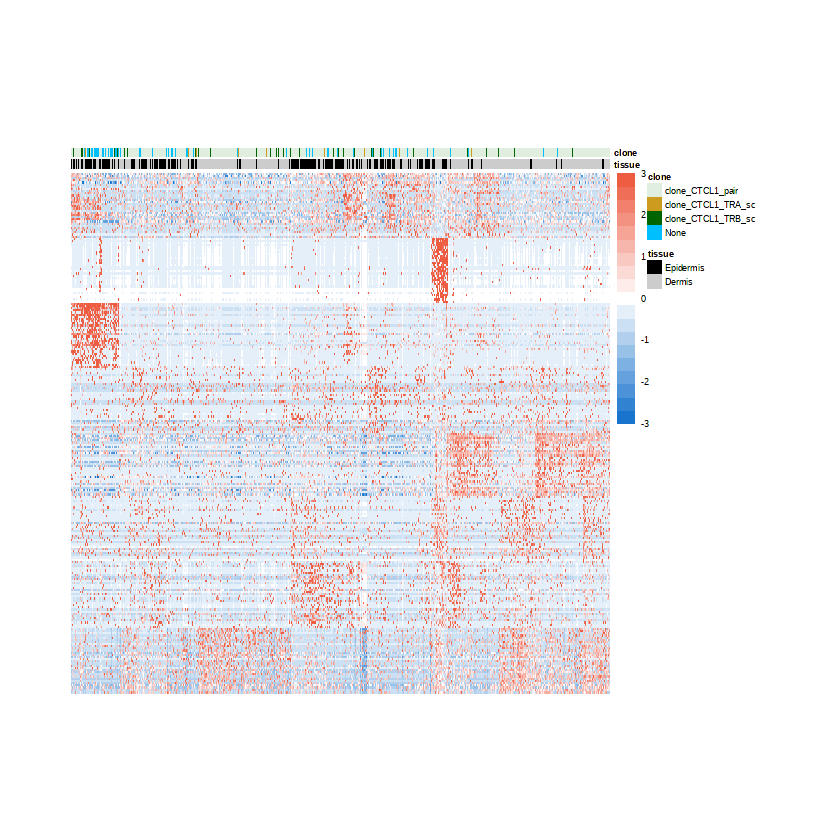

In [93]:
#my_palette<-colorRampPalette(c("dodgerblue3","white","Tomato2"))(n=19)

x <- pheatmap(data,cluster_cols=T, cluster_rows=F, color=my_palette, scale="none",
              fontsize=5,treeheight_row=0,treeheight_col=0, cellheight = 1.3,cellwidth = 0.04,
              show_rownames=F,show_colnames=F, clustering_method = "ward.D", annotation_col = meta,
              annotation_colors = mycolors, border_color=NA)